# Assignment on preprocessing

Do the following on titanic dataset

   1. Load the dataset into python environment
   2. Make ‘PassengerId’ as the index column
   3. Check the basic details of the dataset
   4. Fill in all the missing values present in all the columns in the dataset
   5. Check and handle outliers in at least 3 columns in the dataset
   6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [2]:
data =pd.read_csv(r"C:\Users\anugr\Downloads\titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Make ‘PassengerId’ as the index column.

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.set_index('PassengerId', inplace=True)

In [6]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.Check the basic details of the dataset

In [9]:
#checking shape of the dataset
data.shape

(891, 11)

       . The dataset has 891 rows and 11 columns

In [10]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
data.describe()  #gives statistical description of data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
#checking for null values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

    .Age,Cabin & Embarked columns have null values

In [14]:
data.duplicated().value_counts()

False    891
dtype: int64

    .No duplicate row is present in the dataset

In [15]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

    .Of the 891 passengers 577 were Males and 314 were Females.

## 4. Filling all the missing values present in all the columns in the dataset

In [17]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#checking for missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

 Droping the Cabin column

In [21]:
#Since majority of the values in 'Cabin' is missing, we are droppping that column. 
data =data.drop('Cabin',axis=1)

In [22]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Checking the distribution of the Age column and filling missing values

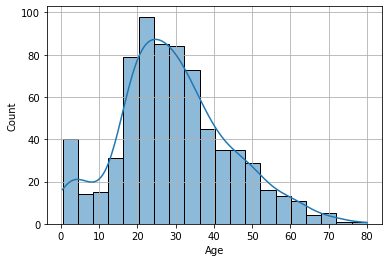

In [25]:
sns.histplot(data=data, x='Age' ,kde=True )
plt.grid()

In [ ]:
#since the data is slightly skewed, we are filling missing values with median

In [26]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [27]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

Filling missing values in the Embarked column

In [28]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [29]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now we have completly treated our missing values in the data set.

## 4. Check and handle outliers in at least 3 columns in the dataset

In [31]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4.1  Checking & Handling Outliers in Age Column.

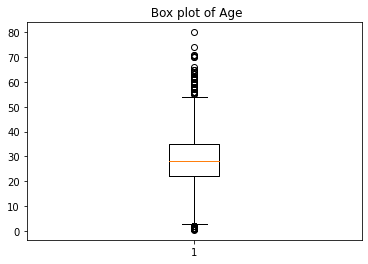

In [32]:
plt.boxplot(data['Age'])
plt.title(' Box plot of Age');

In [43]:
#Finding outliers by IQR method
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
34.0


In [35]:
IQR =Q3-Q1
IQR

13.0

In [36]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit is : ', lower_limit)
print('Upper limit is : ', upper_limit)

Lower limit is :  2.5
Upper limit is :  54.5


In [37]:
outlier = []
for x in data["Age"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)

In [38]:
index_out = data[(data["Age"] > upper_limit)|(data["Age"] < lower_limit)].index
index_out


Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [39]:
data.drop(index_out, inplace =True)

In [40]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.380606,2.341818,28.515152,0.507879,0.357576,31.483615
std,0.485830,0.824096,10.177256,1.090670,0.798599,49.956429
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.416700
75%,1.000000,3.000000,34.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200


### 4.2  Checking & Handling Outliers in Fare Column.

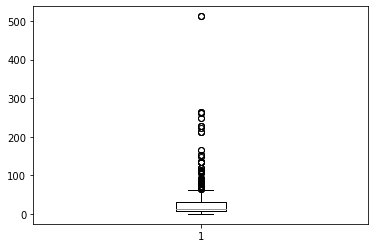

In [42]:
plt.boxplot(data['Fare']);

In [44]:
#Finding outliers by IQR method
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.4167
30.0708


In [45]:
IQR=Q3-Q1
IQR

22.174999999999997

In [46]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit is : ', lower_limit)
print('Upper limit is : ', upper_limit)

Lower limit is :  -25.366699999999994
Upper limit is :  63.333299999999994


In [47]:
outlier = []
for x in data["Fare"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)


In [48]:
#Finding index of outliers & droping it
index_out = data[(data["Fare"] > upper_limit)|(data["Fare"] < lower_limit)].index 
print(index_out)
data.drop(index_out, inplace=True)

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)


In [49]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.334262,2.512535,28.079387,0.413649,0.317549,17.193204
std,0.472061,0.715818,10.012369,0.855001,0.784792,13.244507
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.889575
50%,0.000000,3.000000,28.000000,0.000000,0.000000,11.750000
75%,1.000000,3.000000,32.875000,1.000000,0.000000,25.928150
max,1.000000,3.000000,54.000000,5.000000,6.000000,61.379200


 ### 4.3 Handling the outliers in SibSp column

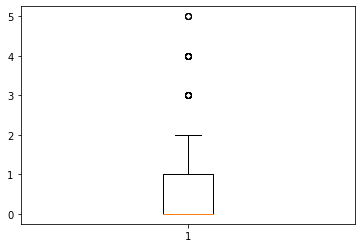

In [50]:
plt.boxplot(data['SibSp']);

In [52]:
Q1 = np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [53]:
IQR=Q3-Q1
IQR

1.0

In [54]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print('Lower limit is : ', lower_limit)
print('Upper limit is : ', upper_limit)

Lower limit is :  -1.5
Upper limit is :  2.5


In [55]:
outlier = []
for x in data["SibSp"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)

In [56]:
#Finding index of outliers & droping it
index_out = data[(data["SibSp"] > upper_limit)|(data["SibSp"] < lower_limit)].index 
data.drop(index_out, inplace=True)

In [57]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.341074,2.493469,28.711176,0.272859,0.269956,16.631246
std,0.474415,0.723586,9.545220,0.501020,0.754625,13.092563
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.450000
max,1.000000,3.000000,54.000000,2.000000,6.000000,61.379200


## 5.Perform the min max scaling on the feature set (Take ‘Survived’ as target)

In [58]:
# Dropping all the column containing categorical data

X = data.drop(["Survived","Name","Sex","Ticket","Embarked"], axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [59]:
from sklearn.preprocessing import MinMaxScaler  #importing the required library for MinMax scaling
minmax = MinMaxScaler(feature_range=(0,1))  #creating instance
X= minmax.fit_transform(X)  #Performing MinMax scaling


In [60]:
X

array([[1.        , 0.37254902, 0.5       , 0.        , 0.11811819],
       [1.        , 0.45098039, 0.        , 0.        , 0.1291154 ],
       [0.        , 0.62745098, 0.5       , 0.        , 0.86511391],
       ...,
       [1.        , 0.49019608, 0.5       , 0.33333333, 0.38205125],
       [0.        , 0.45098039, 0.        , 0.        , 0.48876492],
       [1.        , 0.56862745, 0.        , 0.        , 0.12626427]])

In [61]:
X = pd.DataFrame(X)         
X.columns = ["Pclass","Age","SibSp","Parch","Fare"] # Giving the column their respective names
X

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.372549,0.5,0.000000,0.118118
1,1.0,0.450980,0.0,0.000000,0.129115
2,0.0,0.627451,0.5,0.000000,0.865114
3,1.0,0.627451,0.0,0.000000,0.131152
4,1.0,0.490196,0.0,0.000000,0.137804
...,...,...,...,...,...
684,0.5,0.470588,0.0,0.000000,0.211798
685,0.0,0.313725,0.0,0.000000,0.488765
686,1.0,0.490196,0.5,0.333333,0.382051
687,0.0,0.450980,0.0,0.000000,0.488765
